In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Droping Irrelevent Columns:
* ID & ZIP Code Doesn't make any impact on Personal Loan 

In [8]:
df = df.drop(['ID','ZIP Code'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


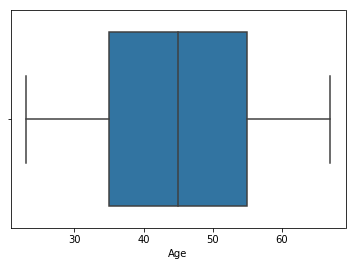

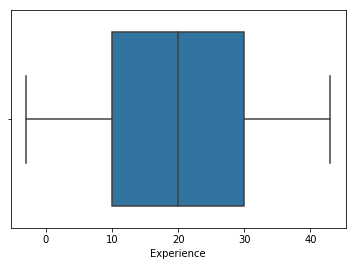

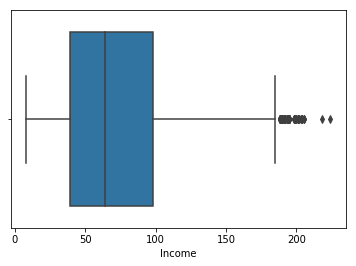

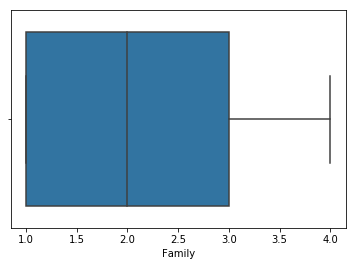

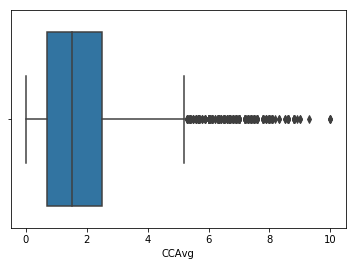

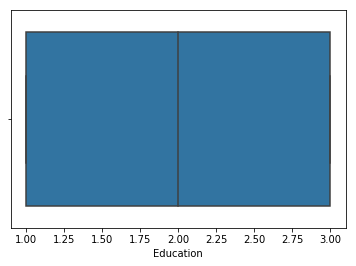

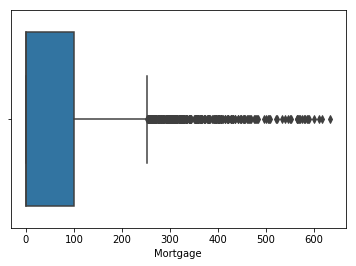

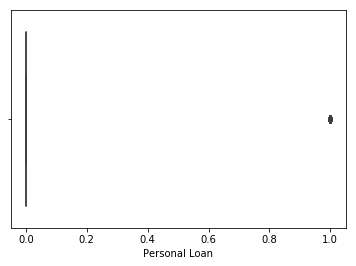

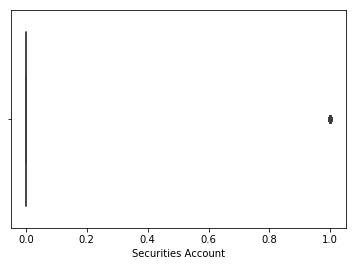

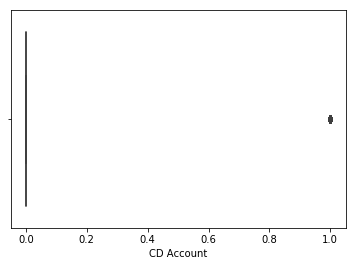

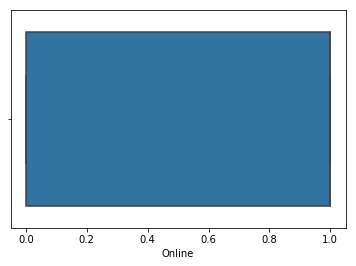

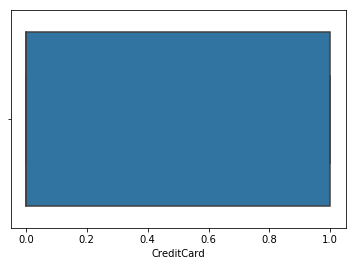

In [16]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

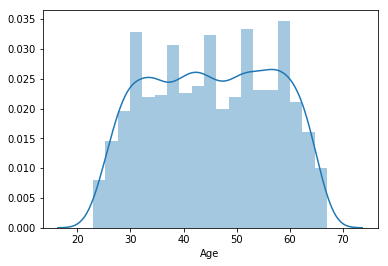

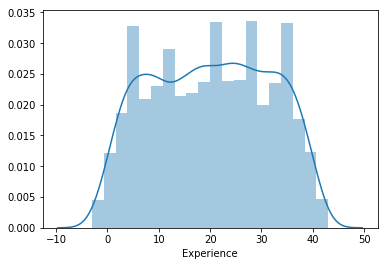

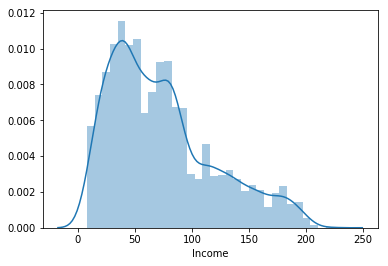

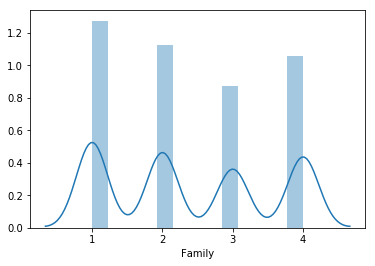

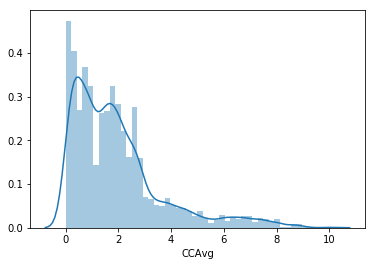

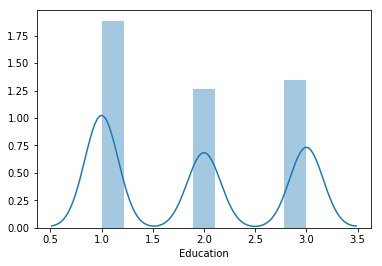

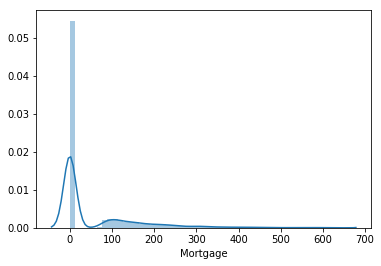

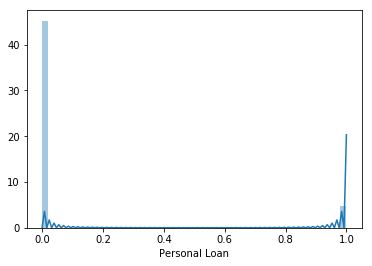

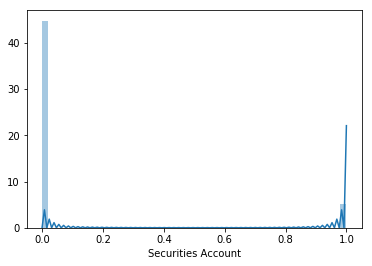

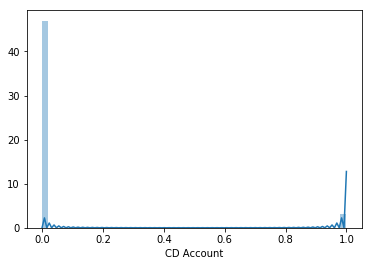

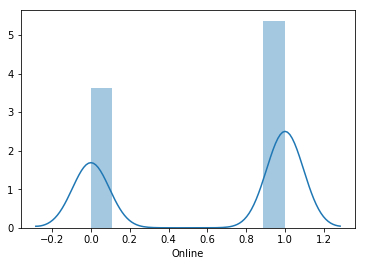

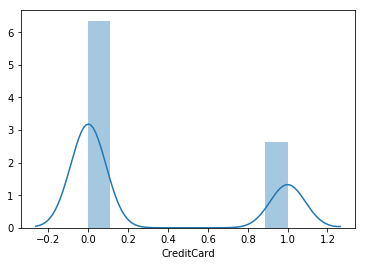

In [17]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

## Inference from Distplot:
* Age, Experience, Income, CCAvg is Multimodal and has Positive Skewness (Mean > Median)
* Mortgage is Bimodal and has Positive Skewness( Mean > Median)

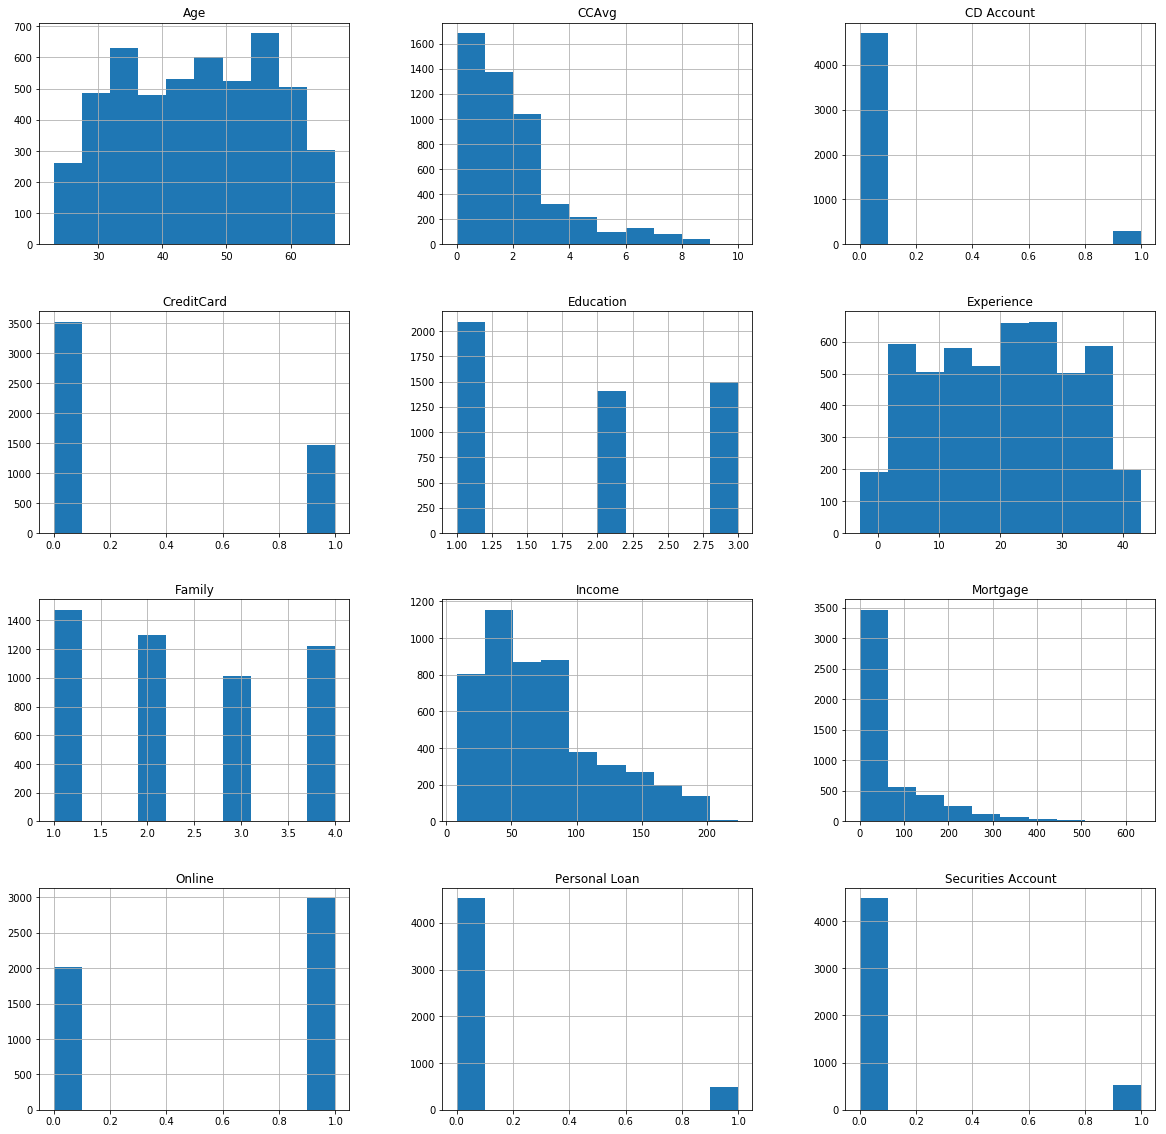

In [19]:
df.hist(figsize= ( 20, 20 ))
plt.show()

# Inference from Histogram
* Dependent Variable is Binary Categorical Variable ( 0 or 1 )
* CD Account, Credit Card, Education, Family, Online, Securities Account are Categorical Variables but in Encoded Format.

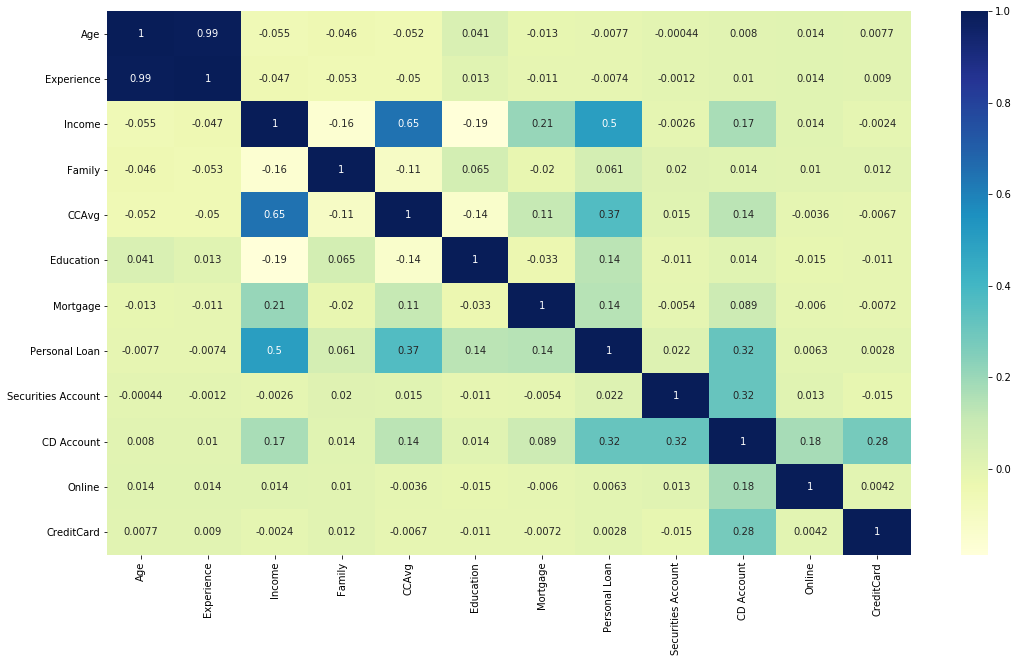

In [21]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot = True,cmap='YlGnBu')

## Infernece from Correlation Matrix:
Personal Loan has Moderate Correlation with CD Account(0.32), CCAvg(0.37), Income(0.5)
Personal Loan has Almost No Correlation with other Independent Variables.
## Applying Decision Tree
Target Variable is Personal Loan which is Binary Categorical ( 0 or 1 )

In [22]:
from sklearn import tree
from sklearn import preprocessing

In [23]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## Splitting dataset

In [24]:
x = df.drop(['Personal Loan'], axis=1)
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [25]:
y = df.iloc[:, 7:8]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [26]:
model = tree.DecisionTreeClassifier(max_depth=22)
model.fit(x,y)

DecisionTreeClassifier(max_depth=22)

In [27]:
model.score(x,y)

1.0

### seems to be model is overfit becuase it's showing 100 % accuracy.

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [30]:
rf.fit(x,y)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [31]:
print(f" The OOB score is : {rf.oob_score_}")

 The OOB score is : 0.9872


In [33]:
a = ['Age', 'Experience', 'Income','Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 
     'Online', 'CreditCard']

for feature, imp in zip(a, rf.feature_importances_):
    print(feature,"\t\t : ",imp);

Age 		 :  0.04485211446059491
Experience 		 :  0.04453401366858768
Income 		 :  0.3488504483273504
Family 		 :  0.09658019984478927
CCAvg 		 :  0.18146050328264263
Education 		 :  0.16168197874856027
Mortgage 		 :  0.044275159476472495
Securities Account 		 :  0.0055746918310432755
CD Account 		 :  0.05369677143335665
Online 		 :  0.008466590932487715
CreditCard 		 :  0.010027527994114615


## Inference:
Income, CCAvg, Education, Family have value more than 0.05 ie, They are Important feature and affect the prediction of Personal Loan

In [34]:
imp = df[['Income','CCAvg','Education','Family']]
imp.head()

,Income,CCAvg,Education,Family
0,49,1.6,1,4
1,34,1.5,1,3
2,11,1.0,1,1
3,100,2.7,2,1
4,45,1.0,2,4


In [35]:
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [36]:
model = tree.DecisionTreeClassifier(max_depth=6)
model.fit(imp,y)

DecisionTreeClassifier(max_depth=6)

In [38]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 

In [39]:
with open('dt1.dot','w') as f:
    f = tree.export_graphviz(model, feature_names=['Income','CCAvg','Education','Family'], out_file=f);

In [42]:
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=['Income','CCAvg','Education','Family'],
                                    class_names=['0','1'] , filled = True))
# display(SVG(graph.pipe(format='svg')))

In [44]:
model.score(imp,y)

0.988

In [45]:
rf.fit(imp,y)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [46]:
rf.oob_score_

0.9874

# Conclusion:
The Accuracy score remains aproximately same in case of Random Forest while predicting on Important Columns than predicting on All Columns.
The Data is Not overfitted as in the first case of prediction using Decision Tree ( prediction of all columns : accuracy = 100%)